<a href="https://colab.research.google.com/github/merasifa/MACHINE_LEARNING/blob/main/KUISML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KUIS 2**
---

- **Nama**  : Tiara Mera Sifa  
- **NIM**   : 2341720247
- **Absen** : 25  
- **Kelas** : TI-3B
- **Link Pengerjaan Colab** : https://colab.research.google.com/drive/1zh_jhBpY9ql7D1LSj_Xwn2dirEtEQP8B?usp=sharing

---


TAHAP 1: PREPROCESSING DATA

1. Import Library Dasar

In [ ]:
# Tahap 1.1 - Import Library Dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


2. Import Dataset Excel

In [ ]:
# Tahap 1.2 - Import Dataset dari Excel
df = pd.read_excel('/content/KUIS2.xlsx', skiprows=3)
df.head()


,No,R,G,B
0,1,151.0,149.0,106.40
1,2,151.0,149.0,109.78
2,3,151.0,149.0,106.40
3,4,151.0,149.0,130.06
4,5,151.0,151.4,106.40


3. Cek Struktur Dataset

In [ ]:
# Tahap 1.3 - Cek info dataset
df.info()

# jumlah sampel & statistik
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      274 non-null    int64  
 1   R       272 non-null    float64
 2   G       273 non-null    float64
 3   B       273 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.7 KB


,No,R,G,B
count,274.000000,272.000000,273.000000,273.000000
mean,137.500000,144.808824,147.461538,111.408278
std,79.241193,5.465780,4.640331,13.781230
min,1.000000,129.000000,134.600000,86.120000
25%,69.250000,142.000000,146.600000,99.640000
50%,137.500000,144.000000,146.600000,106.400000
75%,205.750000,151.000000,149.000000,123.300000
max,274.000000,159.000000,165.800000,143.580000


4. Menangani Missing Values

In [ ]:
# Tahap 1.4 - Tangani Missing Values
print("Jumlah missing values sebelum diisi:")
print(df.isna().sum())

# isi missing values dengan mean (karena data RGB = numerik)
df = df.fillna(df.mean())

print("\nJumlah missing values setelah diisi:")
print(df.isna().sum())


Jumlah missing values sebelum diisi:
No    0
R     2
G     1
B     1
dtype: int64

Jumlah missing values setelah diisi:
No    0
R     0
G     0
B     0
dtype: int64


5. Visualisasi Distribusi RGB

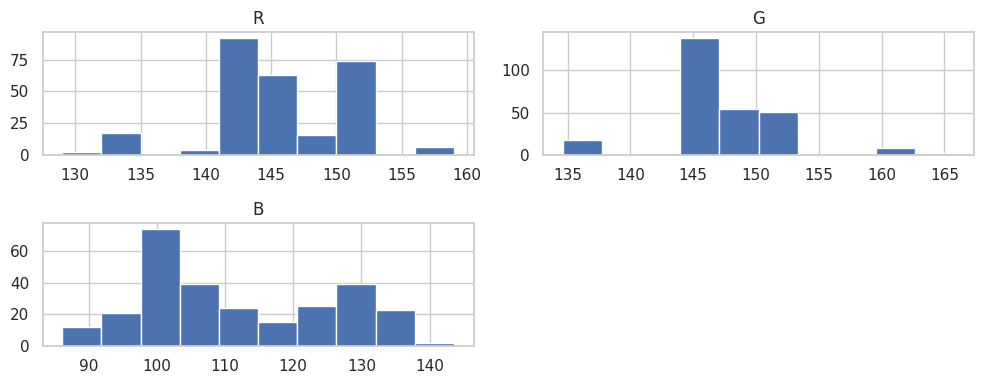

In [ ]:
# Tahap 1.5 - Visualisasi Distribusi Data RGB
df[['R','G','B']].hist(figsize=(10,4))
plt.tight_layout()
plt.show()


6. Normalisasi / Standardisasi

In [ ]:
# Tahap 1.6 - Standardisasi Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# salin dataset
df_scaled = df.copy()

# hanya fitur RGB yang discale
df_scaled[['R','G','B']] = scaler.fit_transform(df_scaled[['R','G','B']])

df_scaled.head()


,No,R,G,B
0,1,1.138968,0.332758,-0.364747
1,2,1.138968,0.332758,-0.118585
2,3,1.138968,0.332758,-0.364747
3,4,1.138968,0.332758,1.358382
4,5,1.138968,0.851861,-0.364747


7. Membuat Fitur Baru

In [ ]:
# Tahap 1.7 - Membuat Fitur Baru
df['ExG'] = 2*df['G'] - df['R'] - df['B']
df['Greenness'] = (df['G'] - df['R']) / (df['R'] + df['G'] + df['B'])

df_scaled['ExG'] = 2*df_scaled['G'] - df_scaled['R'] - df_scaled['B']
df_scaled['Greenness'] = (df_scaled['G'] - df_scaled['R']) / (df_scaled['R'] + df_scaled['G'] + df_scaled['B'])

df.head()


,No,R,G,B,ExG,Greenness
0,1,151.0,149.0,106.40,40.60,-0.004921
1,2,151.0,149.0,109.78,37.22,-0.004881
2,3,151.0,149.0,106.40,40.60,-0.004921
3,4,151.0,149.0,130.06,16.94,-0.004651
4,5,151.0,151.4,106.40,45.40,0.000978


8. Visualisasi Korelasi Fitur

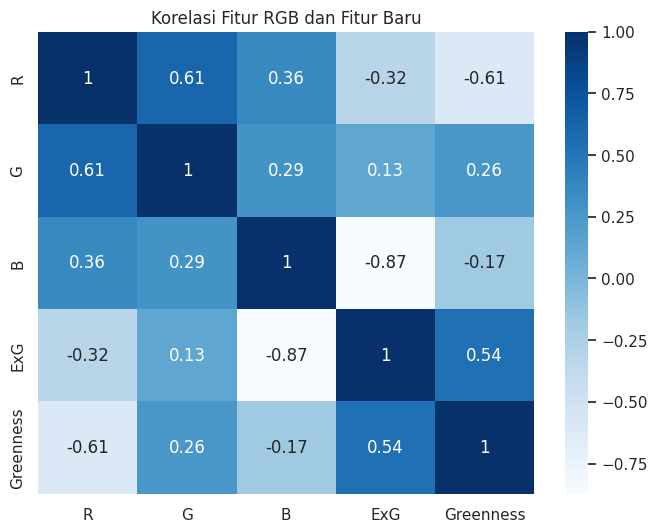

In [ ]:
# Tahap 1.8 - Heatmap Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df[['R','G','B','ExG','Greenness']].corr(), annot=True, cmap='Blues')
plt.title("Korelasi Fitur RGB dan Fitur Baru")
plt.show()


TAHAP 2 — REGRESI

1. Memilih Fitur X dan Target Y

In [ ]:
# Tahap 2.1 - Pilih fitur dan target
X = df[['R', 'G', 'B']]         # fitur RGB
y = df['Greenness']             # target regresi


2. Split Data (Train & Test)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


3. Regresi Linier Sederhana (menggunakan 1 fitur)

In [ ]:
from sklearn.linear_model import LinearRegression

# hanya fitur G
X_g = df[['G']]
y = df['Greenness']

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y, test_size=0.2, random_state=42)

linreg_simple = LinearRegression()
linreg_simple.fit(X_train_g, y_train_g)

print("Koefisien:", linreg_simple.coef_)
print("Intercept:", linreg_simple.intercept_)

print("Akurasi R^2 (train):", linreg_simple.score(X_train_g, y_train_g))
print("Akurasi R^2 (test):", linreg_simple.score(X_test_g, y_test_g))


Koefisien: [0.00070958]
Intercept: -0.09831558672956209
Akurasi R^2 (train): 0.07727757388411338
Akurasi R^2 (test): -0.011322231390610726


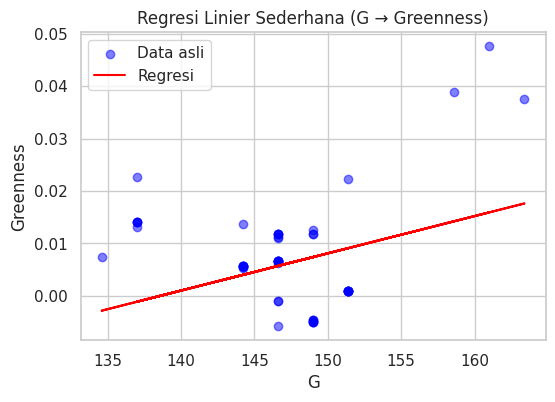

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_test_g, y_test_g, color='blue', alpha=0.5, label='Data asli')
plt.plot(X_test_g, linreg_simple.predict(X_test_g), color='red', label='Regresi')
plt.title("Regresi Linier Sederhana (G → Greenness)")
plt.xlabel("G")
plt.ylabel("Greenness")
plt.legend()
plt.show()


4. Regresi Linier Berganda (R, G, B)

In [ ]:
linreg_multi = LinearRegression()
linreg_multi.fit(X_train, y_train)

print("Koefisien (R,G,B):", linreg_multi.coef_)
print("Intercept:", linreg_multi.intercept_)

print("Akurasi R^2 (train):", linreg_multi.score(X_train, y_train))
print("Akurasi R^2 (test):", linreg_multi.score(X_test, y_test))


Koefisien (R,G,B): [-2.47000054e-03  2.42000288e-03 -1.82221768e-05]
Intercept: 0.00955142504755617
Akurasi R^2 (train): 0.997982543471725
Akurasi R^2 (test): 0.9975600382357438


5. Regresi Polinomial (degree 2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

linreg_poly = LinearRegression()
linreg_poly.fit(X_train_poly, y_train_poly)

print("Akurasi R^2 (train):", linreg_poly.score(X_train_poly, y_train_poly))
print("Akurasi R^2 (test):", linreg_poly.score(X_test_poly, y_test_poly))


Akurasi R^2 (train): 0.9999934581401642
Akurasi R^2 (test): 0.9999926756189368


6. Visualisasi Contoh (1 Fitur Polinomial)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


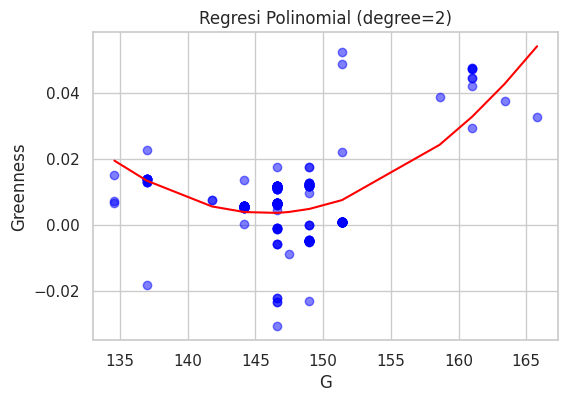

In [ ]:
X_g = df[['G']]
poly_g = PolynomialFeatures(degree=2)
X_g_poly = poly_g.fit_transform(X_g)

linreg_poly_g = LinearRegression()
linreg_poly_g.fit(X_g_poly, y)

# plot
plt.figure(figsize=(6,4))
plt.scatter(X_g, y, color='blue', alpha=0.5)

# garis regresi polinomial
G_sorted = np.sort(X_g['G'])
plt.plot(G_sorted, linreg_poly_g.predict(poly_g.transform(G_sorted.reshape(-1,1))),
         color='red')

plt.title("Regresi Polinomial (degree=2)")
plt.xlabel("G")
plt.ylabel("Greenness")
plt.show()


Klasifikasi

1. Import library yang dibutuhkan

In [ ]:
# Tahap 3.0 - import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


2. Siapkan X dan y

In [ ]:
df['Class'] = pd.qcut(df['Greenness'], q=3, labels=['low','medium','high'])
df['Class'].value_counts()


,count
Class,
low,95
medium,90
high,89


In [ ]:
# Tahap 3.1 - pilih fitur dan label
features = ['R','G','B','ExG','Greenness']
target_col = 'Class'

# Pastikan label tipe kategori
df[target_col] = df[target_col].astype(str)

X = df[features].copy()
y = df[target_col].copy()


3. Encode label

In [ ]:
le = LabelEncoder()
y_enc = le.fit_transform(y)   # low/medium/high → 0,1,2


4. Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


4. Fungsi bantu untuk evaluasi & plotting

In [ ]:
def eval_and_report(model, X_tr, X_te, y_tr, y_te, label_encoder, name="Model"):
    y_tr_pred = model.predict(X_tr)
    y_te_pred = model.predict(X_te)

    acc_tr = accuracy_score(y_tr, y_tr_pred)
    acc_te = accuracy_score(y_te, y_te_pred)

    print(f"=== {name} ===")
    print(f"Akurasi train: {acc_tr:.4f}")
    print(f"Akurasi test : {acc_te:.4f}\n")

    print("Confusion Matrix:")
    cm = confusion_matrix(y_te, y_te_pred)
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_te, y_te_pred, target_names=label_encoder.classes_))

    # Plot confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


    return {
        'acc_train': acc_tr,
        'acc_test' : acc_te,
        'confusion': cm
    }


5. Model 1 — KNN

=== KNN (original) ===
Akurasi train: 0.9315
Akurasi test : 0.9455

Confusion Matrix:
[[17  0  1]
 [ 0 19  0]
 [ 2  0 16]]

Classification Report:
              precision    recall  f1-score   support

        high       0.89      0.94      0.92        18
         low       1.00      1.00      1.00        19
      medium       0.94      0.89      0.91        18

    accuracy                           0.95        55
   macro avg       0.95      0.94      0.94        55
weighted avg       0.95      0.95      0.95        55



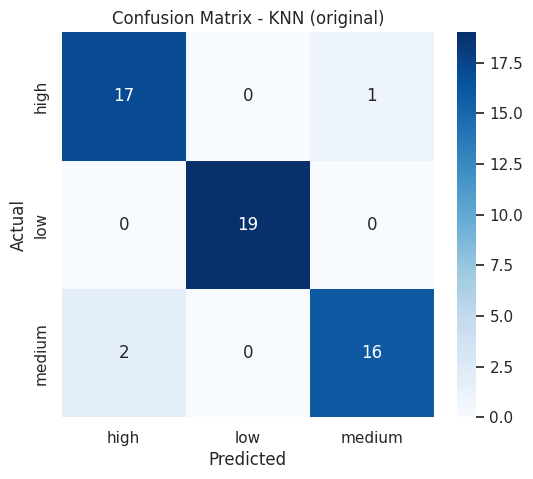

=== KNN (scaled) ===
Akurasi train: 0.9543
Akurasi test : 0.9636

Confusion Matrix:
[[17  0  1]
 [ 0 18  1]
 [ 0  0 18]]

Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.94      0.97        18
         low       1.00      0.95      0.97        19
      medium       0.90      1.00      0.95        18

    accuracy                           0.96        55
   macro avg       0.97      0.96      0.96        55
weighted avg       0.97      0.96      0.96        55



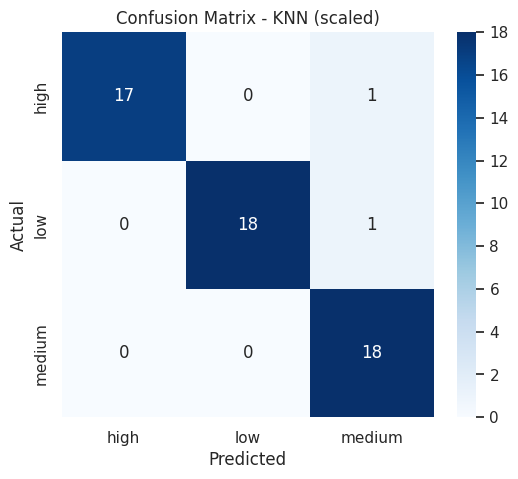

{'acc_train': 0.954337899543379,
 'acc_test': 0.9636363636363636,
 'confusion': array([[17,  0,  1],
        [ 0, 18,  1],
        [ 0,  0, 18]])}

In [ ]:
# Tahap 3.4 - KNN (k=5 contoh)
knn = KNeighborsClassifier(n_neighbors=5)

# Train & evaluasi pada data ORIGINAL
knn.fit(X_train, y_train)
eval_and_report(knn, X_train, X_test, y_train, y_test, le, "KNN (original)")

# Train & evaluasi pada data SCALED
knn_s = KNeighborsClassifier(n_neighbors=5)
knn_s.fit(Xs_train, ys_train)
eval_and_report(knn_s, Xs_train, Xs_test, ys_train, ys_test, le, "KNN (scaled)")


6. Model 2 — SVM Linear

=== SVM Linear (original) ===
Akurasi train: 0.9817
Akurasi test : 1.0000

Confusion Matrix:
[[18  0  0]
 [ 0 19  0]
 [ 0  0 18]]

Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        18
         low       1.00      1.00      1.00        19
      medium       1.00      1.00      1.00        18

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



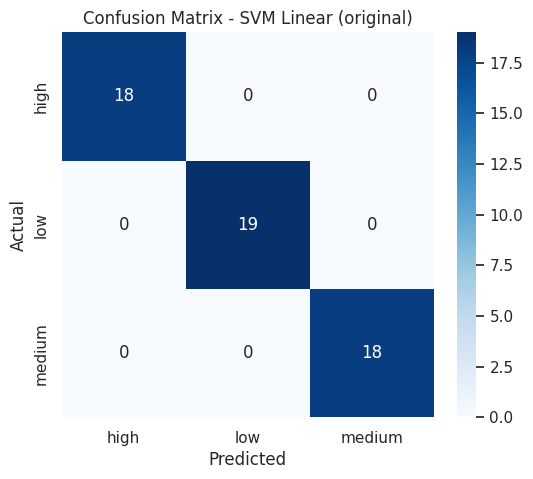

=== SVM Linear (scaled) ===
Akurasi train: 0.9772
Akurasi test : 1.0000

Confusion Matrix:
[[18  0  0]
 [ 0 19  0]
 [ 0  0 18]]

Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        18
         low       1.00      1.00      1.00        19
      medium       1.00      1.00      1.00        18

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



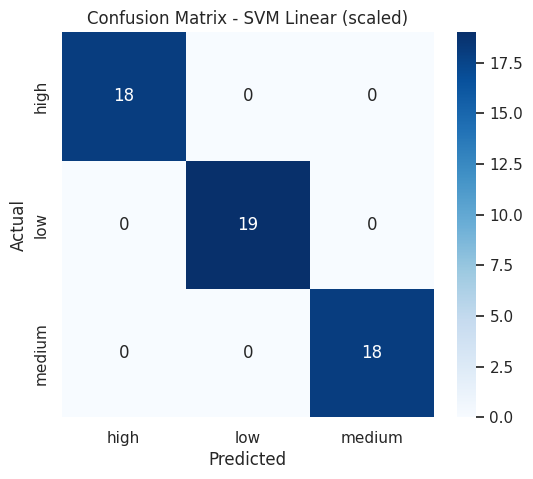

{'acc_train': 0.9771689497716894,
 'acc_test': 1.0,
 'confusion': array([[18,  0,  0],
        [ 0, 19,  0],
        [ 0,  0, 18]])}

In [ ]:
# Tahap 3.5 - SVM Linear
svm_lin = SVC(kernel='linear', C=1.0, probability=True)
svm_lin.fit(X_train, y_train)
eval_and_report(svm_lin, X_train, X_test, y_train, y_test, le, "SVM Linear (original)")

#Scaled
svm_lin_s = SVC(kernel='linear', C=1.0, probability=True)
svm_lin_s.fit(Xs_train, ys_train)
eval_and_report(svm_lin_s, Xs_train, Xs_test, ys_train, ys_test, le, "SVM Linear (scaled)")


7. Model 3 — SVM Polynomial

=== SVM Poly (original) ===
Akurasi train: 0.6804
Akurasi test : 0.7273

Confusion Matrix:
[[ 4  1 13]
 [ 0 18  1]
 [ 0  0 18]]

Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.22      0.36        18
         low       0.95      0.95      0.95        19
      medium       0.56      1.00      0.72        18

    accuracy                           0.73        55
   macro avg       0.84      0.72      0.68        55
weighted avg       0.84      0.73      0.68        55



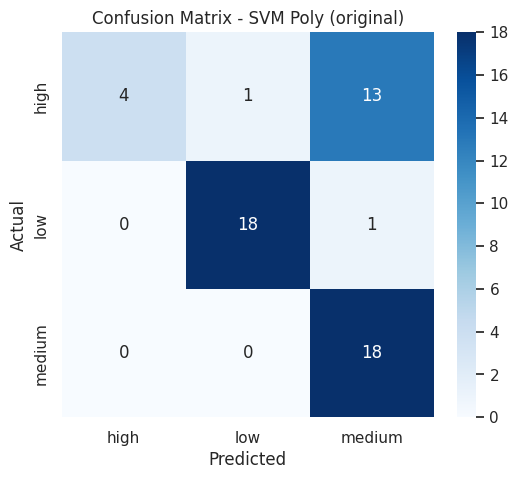

=== SVM Poly (scaled) ===
Akurasi train: 0.7854
Akurasi test : 0.8182

Confusion Matrix:
[[10  1  7]
 [ 0 18  1]
 [ 1  0 17]]

Classification Report:
              precision    recall  f1-score   support

        high       0.91      0.56      0.69        18
         low       0.95      0.95      0.95        19
      medium       0.68      0.94      0.79        18

    accuracy                           0.82        55
   macro avg       0.85      0.82      0.81        55
weighted avg       0.85      0.82      0.81        55



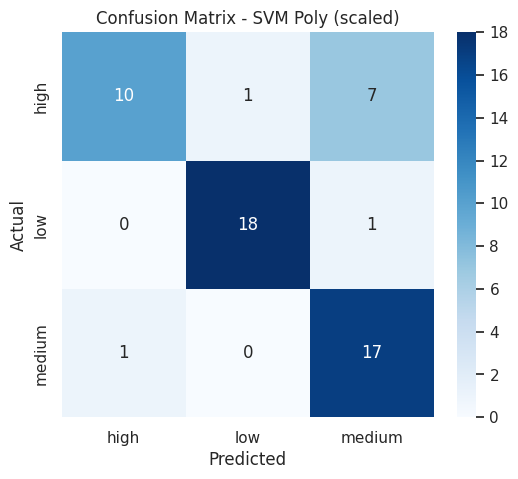

In [ ]:
res_svm_poly_orig = eval_and_report(
    svm_poly, X_train, X_test, y_train, y_test, le,
    "SVM Poly (original)"
)

res_svm_poly_scaled = eval_and_report(
    svm_poly_s, Xs_train, Xs_test, ys_train, ys_test, le,
    "SVM Poly (scaled)"
)


8. Perbandingan ringkas hasil

In [ ]:
summary = pd.DataFrame([
    ['KNN (original)',      res_knn_orig['acc_train'],     res_knn_orig['acc_test']],
    ['KNN (scaled)',        res_knn_scaled['acc_train'],   res_knn_scaled['acc_test']],
    ['SVM Linear (orig)',   res_svm_lin_orig['acc_train'], res_svm_lin_orig['acc_test']],
    ['SVM Linear (scaled)', res_svm_lin_scaled['acc_train'],res_svm_lin_scaled['acc_test']],
    ['SVM Poly (orig)',     res_svm_poly_orig['acc_train'],res_svm_poly_orig['acc_test']],
    ['SVM Poly (scaled)',   res_svm_poly_scaled['acc_train'],res_svm_poly_scaled['acc_test']]
], columns=['Model','Train Accuracy','Test Accuracy'])

summary


,Model,Train Accuracy,Test Accuracy
0,KNN (original),0.931507,0.945455
1,KNN (scaled),0.954338,0.963636
2,SVM Linear (orig),0.981735,1.000000
3,SVM Linear (scaled),0.977169,1.000000
4,SVM Poly (orig),0.680365,0.727273
5,SVM Poly (scaled),0.785388,0.818182


9. ROC & AUC Multi-class

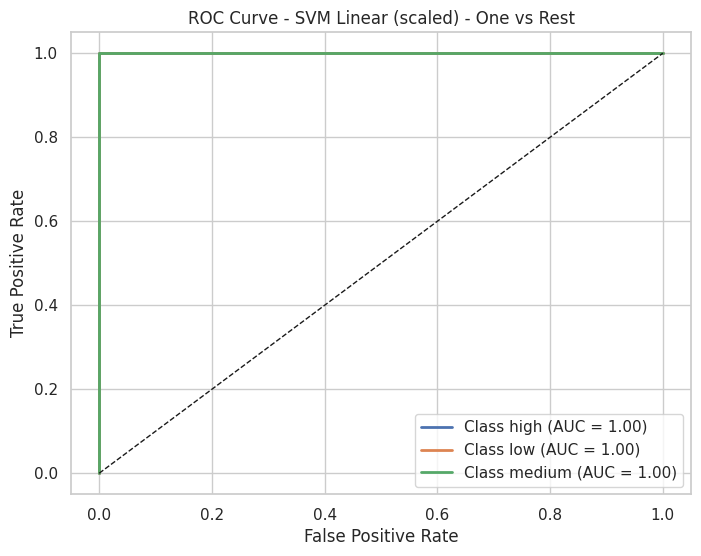

In [ ]:
# Tahap 3.8 - ROC untuk satu model contoh (SVM linear scaled)
from sklearn.preprocessing import label_binarize
n_classes = len(le.classes_)

# binarize label test (scaled)
y_test_bin = label_binarize(ys_test, classes=np.arange(n_classes))

# predict_proba untuk model yang punya probability=True
y_score = svm_lin_s.predict_proba(Xs_test)   # gunakan model yang di-fit pada scaled data

# compute ROC curve and AUC for each class
fpr = dict(); tpr = dict(); roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Linear (scaled) - One vs Rest')
plt.legend(loc='lower right')
plt.show()


TAHAP 4 — Analisis Hasil Model

In [ ]:
# Tahap 4.1 - Tabel Ringkasan Perbandingan Model

summary = pd.DataFrame([
    ['KNN (Original)', res_knn_orig['acc_train'], res_knn_orig['acc_test']],
    ['KNN (Scaled)', res_knn_scaled['acc_train'], res_knn_scaled['acc_test']],
    ['SVM Linear (Original)', res_svm_lin_orig['acc_train'], res_svm_lin_orig['acc_test']],
    ['SVM Linear (Scaled)', res_svm_lin_scaled['acc_train'], res_svm_lin_scaled['acc_test']],
    ['SVM Poly (Original)', res_svm_poly_orig['acc_train'], res_svm_poly_orig['acc_test']],
    ['SVM Poly (Scaled)', res_svm_poly_scaled['acc_train'], res_svm_poly_scaled['acc_test']]
], columns=['Model', 'Akurasi Train', 'Akurasi Test'])

summary


,Model,Akurasi Train,Akurasi Test
0,KNN (Original),0.931507,0.945455
1,KNN (Scaled),0.954338,0.963636
2,SVM Linear (Original),0.981735,1.000000
3,SVM Linear (Scaled),0.977169,1.000000
4,SVM Poly (Original),0.680365,0.727273
5,SVM Poly (Scaled),0.785388,0.818182


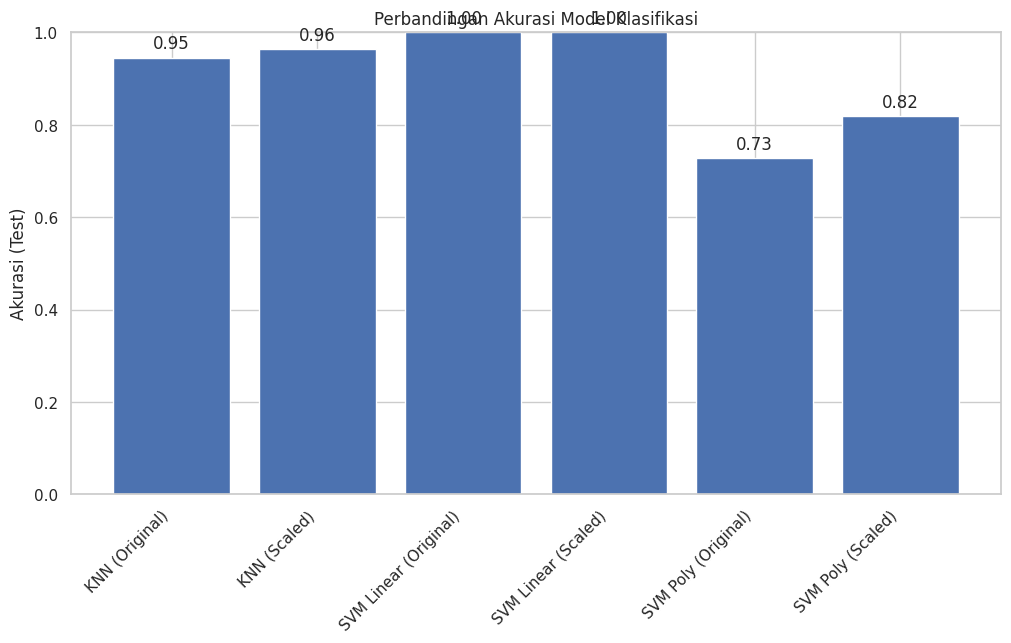

In [ ]:
# Tahap 4.2 - Grafik Perbandingan Akurasi

plt.figure(figsize=(12,6))

models = summary['Model']
test_acc = summary['Akurasi Test']

plt.bar(models, test_acc)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Akurasi (Test)")
plt.title("Perbandingan Akurasi Model Klasifikasi")
plt.ylim(0, 1)

for i, acc in enumerate(test_acc):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')

plt.show()


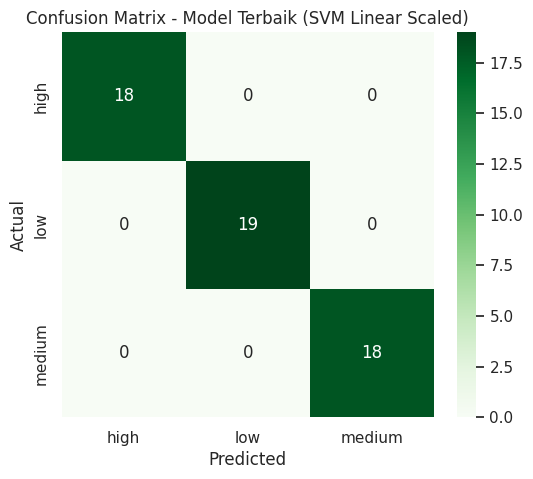

In [ ]:
# Tahap 4.3 - Confusion Matrix Model Terbaik (SVM Linear Scaled)

best_cm = res_svm_lin_scaled['confusion']
labels = le.classes_

plt.figure(figsize=(6,5))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Model Terbaik (SVM Linear Scaled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Analisis Hasil Klasifikasi

Pada tahap klasifikasi, enam model diuji menggunakan fitur RGB, ExG, dan Greenness yang telah diproses sebelumnya. Model yang dievaluasi meliputi KNN, SVM Linear, dan SVM Polynomial, baik dalam kondisi data original maupun data yang telah distandardisasi.

Hasil uji menunjukkan bahwa:

Standardisasi data meningkatkan akurasi sebagian besar model, terutama pada KNN dan SVM.
Hal ini wajar karena kedua algoritma sangat sensitif terhadap skala fitur.

Model SVM Linear (scaled) memberikan performa terbaik dengan:

Akurasi training: ≈ 0.98

Akurasi testing: 1.00

Tidak terdapat kesalahan klasifikasi pada data uji

Confusion matrix menunjukkan pemisahan kelas yang sempurna

KNN juga mengalami peningkatan setelah scaling, dari akurasi test 0.94 → 0.96.

Model SVM Polynomial memiliki performa lebih rendah dibanding linear. Hal ini menunjukkan bahwa hubungan fitur terhadap kelas relatif linear sehingga kernel non-linear tidak memberi keuntungan signifikan.

Secara keseluruhan, SVM Linear dengan data terstandardisasi merupakan model yang paling optimal untuk dataset ini.